In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


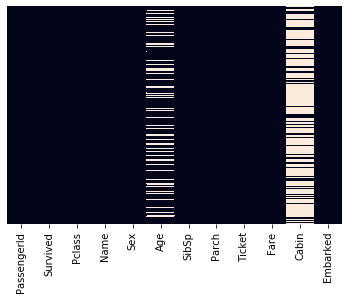

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

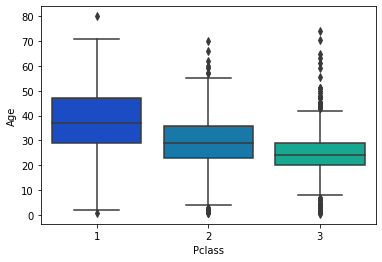

In [17]:
sns.boxplot(x='Pclass', y='Age', data= df,palette='winter')

# Analysis
The median age for Pclass 1 is 37
The median age for Pclass 2 is 29
The median age for Pclass 3 is 24

Let's update the NULL values with the obtained median values

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return  29
        elif Pclass == 3:
             return 24
    else:
        return Age 
        

In [16]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age,axis=1)

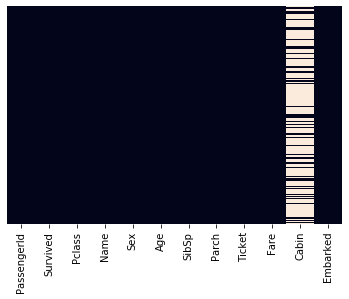

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [21]:
df.drop('Cabin', axis=1, inplace=True)

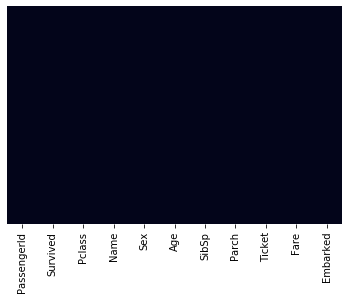

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

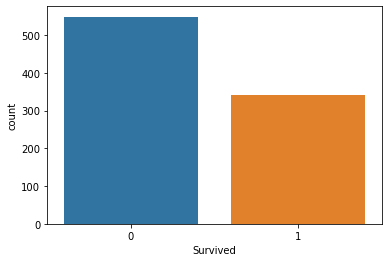

In [23]:
sns.countplot(data=df, x='Survived')

# Analysis
The death count is more than survived count.

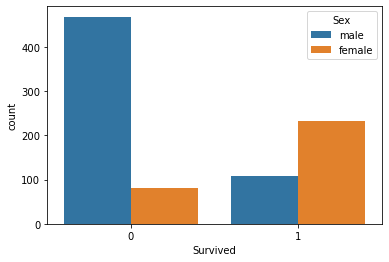

In [24]:
sns.countplot(data=df, x='Survived', hue='Sex')

# Analysis
The count of __died__ male is more than count of female died
The count of __survived__ male is less than count of female survived

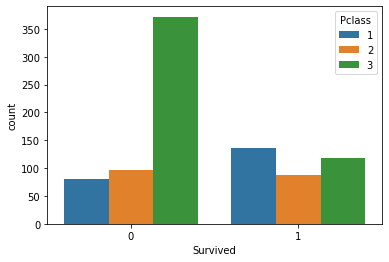

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=df)

# Analysis
1) The death of higher classes is lower than rest of the classes

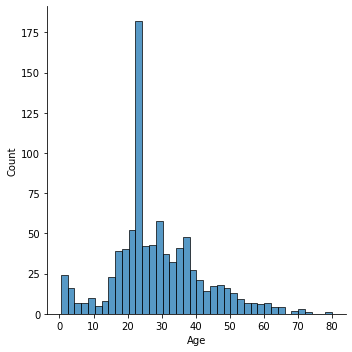

In [37]:
sns.displot(data=df, x='Age', bins=40)

# Analysis
1) The count of young age group is highest

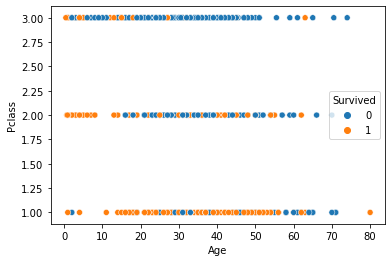

In [36]:
sns.scatterplot(data=df,x='Age', y='Pclass', hue='Survived' )

# Analysis
1) The age group (0-10) almost survived for Pclass = 2
2) Survival for Pclass = 1 is highest
3) Death for Pclass = 3 is highest
4) After age 65 almost everyone died for all the classes